

### Iowa Liquor Sales 

---



I will be using the pandas data transformation functionality (melt, pivot, groupby, apply). 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. 

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows us to explore it graphically and download it (though it doesn't work very well).

NOTE: Some  may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens.  
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [3]:
iowa_file = 'Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [4]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55




## 3. Clean the dataset

---

### 3.1 Identify columns that will be need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless we want to (not required for these problems and is a challenging thing to work with in its own right.)

### 3.2 Clean the columns

In [5]:

print "Drop NaN records"
iowa_clean = iowa.dropna()

Drop NaN records


In [6]:
iowa_clean.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [7]:
print "Get rid of commas and dollar signs"

for col in ['State Bottle Cost','State Bottle Retail','Sale (Dollars)']:
    iowa_clean[col] = [float(x.replace('$','')) for x in iowa_clean[col]]

Get rid of commas and dollar signs


/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
iowa_clean.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [75]:
iowa_clean['Date'] = pd.to_datetime(iowa_clean['Date'])
iowa_clean.head()

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),yearly_sales,profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,305.88,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,305.88,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,305.88,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,305.88,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,305.88,43.20




## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

1. I investigate problematic stores.
2. I will ecide on an approach to deal with stores not open for the full 2015 year.
3. I will implement a plan.
4. I will Briefly report on what I did and why.


In [82]:
# create list of unique stores
iowa_clean_uniq_stors = (iowa_clean['Store Number']).unique()
len(iowa_clean_uniq_stors), len(iowa_clean['Store Number'])
print iowa_clean_uniq_stors

[3717 2614 2106 ..., 9018 5201 4778]


In [77]:
# some examples for a particular store
iowa_clean[(iowa_clean['Store Number'] == 2614)].head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),yearly_sales,profit
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,305.88,13.76
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77,305.88,29.94
260,2016-02-17,2614,DAVENPORT,52807,82.0,Scott,1031200.0,VODKA FLAVORED,380,41601,Uv Blue (raspberry) Vodka,375,3.45,5.18,3,15.54,1.12,0.30,305.88,5.19
424,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1031200.0,VODKA FLAVORED,380,41604,Uv Grape Vodka,750,6.50,9.75,1,9.75,0.75,0.20,305.88,3.25
908,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1011200.0,STRAIGHT BOURBON WHISKIES,461,22155,Wild Turkey 101 Round,375,6.25,9.38,1,9.38,0.38,0.10,305.88,3.13


In [123]:
#make masks for wheter the date contains Dec 2015 and Jan 2015

mask_date_dec = (iowa_clean['Date'] == '2015-12')
mask_date_jan = (iowa_clean['Date'] == '2015-01')

# Let's look to see how many store have both  
iowa_clean_fullyear = iowa_clean[~mask_date_dec].groupby("Store Number")
len(iowa_clean_fullyear)
iowa_clean_fullyear.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),yearly_sales,profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,305.88,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,305.88,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,305.88,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,305.88,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,305.88,43.20
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,305.88,39.96
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,305.88,9.99
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,305.88,15.76
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,305.88,23.00
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,305.88,7.62


In [ ]:
# Ok, some! 



## 5. Proposals for new tax rates (Scenario 1)
 
---

Supposed I am a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned me to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [36]:

yearly_sales_summary = pd.pivot_table(iowa_clean, 
                               values='Sale (Dollars)',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
yearly_sales_summary.head()

,sum
Store Number,
2106,176517.45
2113,11376.12
2130,139440.02
2152,8625.74
2178,29912.68


### 5.2 Calculate the profit each store is making in 2015.


In [39]:
iowa_clean['profit'] = (iowa_clean['State Bottle Retail'] - iowa_clean['State Bottle Cost'])
iowa_clean['profit'] = iowa_clean['profit'] * iowa_clean['Bottles Sold']
iowa_clean.head()

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),yearly_sales,profit
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,305.88,27.00
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,305.88,13.76
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,305.88,151.20
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,305.88,28.50
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,305.88,43.20


In [40]:
yearly_profit_summary = pd.pivot_table(iowa_clean, 
                               values='profit',
                               columns=[''],
                               aggfunc=[np.sum])
yearly_profit_summary.head()

,sum
Store Number,
2106,58916.88
2113,3802.53
2130,46517.61
2152,2891.61
2178,10034.46


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [54]:
yearly_profit_county = pd.pivot_table(iowa_clean, 
                               values='profit',
                               columns=['County'],
                               aggfunc=[np.sum])

yearly_profit_county.sort(['sum'],ascending=False, axis=0).head()

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,sum
County,
Polk,2587988.80
Linn,1049104.37
Scott,820459.79
Johnson,693939.03
Black Hawk,644194.12


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [59]:
yearly_galons_store = pd.pivot_table(iowa_clean, 
                               values='Volume Sold (Gallons)',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
yearly_galons_store.head()

,sum
Store Number,
2106,3127.28
2113,221.03
2130,2228.81
2152,190.39
2178,644.09


In [61]:
yearly_profit_store = pd.pivot_table(iowa_clean, 
                               values='profit',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
yearly_profit_store.head()

,sum
Store Number,
2106,58916.88
2113,3802.53
2130,46517.61
2152,2891.61
2178,10034.46


In [70]:
y  = yearly_galons_store.iloc[:, 0:]
X = yearly_profit_store
print X.shape, len(y)

(1378, 1) 1378


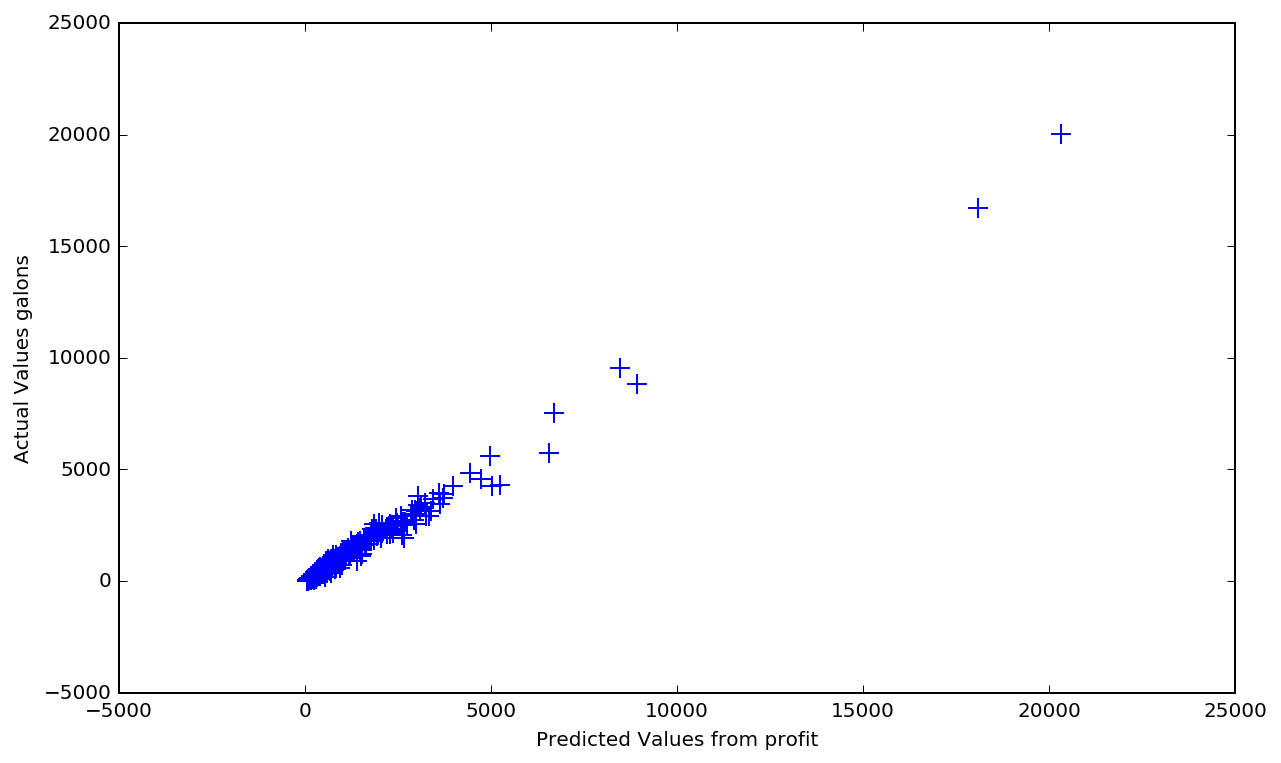

MSE: 15074.3242298


In [73]:
# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lm = linear_model.LinearRegression() 
model = lm.fit(X, y)

predictions = lm.predict(X)

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from profit")
plt.ylabel("Actual Values galons")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories.

In [91]:
# group by City

len(iowa_clean.groupby("City"))

382

In [101]:
iowa_clean_city = iowa_clean.groupby("City").transform(lambda x: x.fillna(x.mean()))

### 5.7 Do relationships exist between the broader liquor type and profit?

In [102]:
city_yearly_galons_store = pd.pivot_table(iowa_clean_city, 
                               values='Volume Sold (Gallons)',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
city_yearly_galons_store.head()

,sum
Store Number,
2106,3127.28
2113,221.03
2130,2228.81
2152,190.39
2178,644.09


In [103]:
city_yearly_profit_store = pd.pivot_table(iowa_clean_city, 
                               values='profit',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
city_yearly_profit_store.head()

,sum
Store Number,
2106,58916.88
2113,3802.53
2130,46517.61
2152,2891.61
2178,10034.46


In [104]:
y  = city_yearly_galons_store.iloc[:, 0:]
X = city_yearly_profit_store
print X.shape, len(y)

(1378, 1) 1378


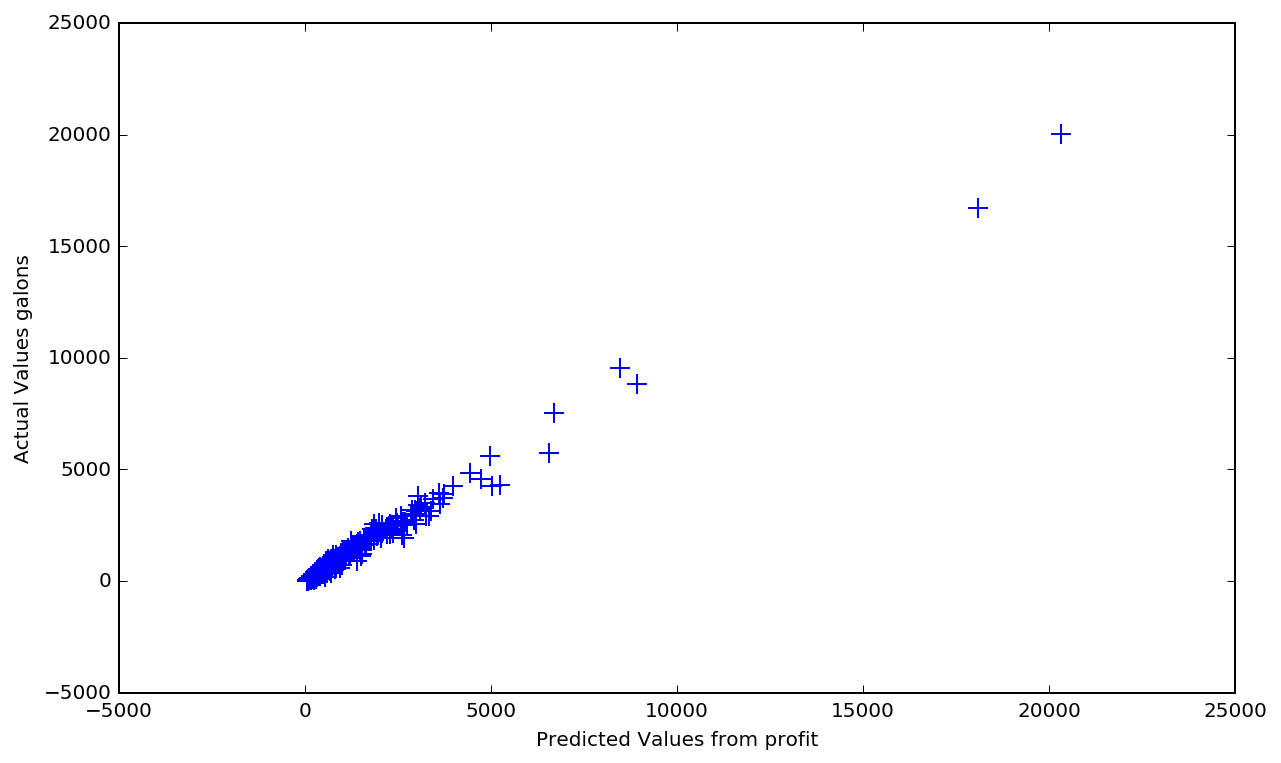

MSE: 15074.3242298


In [105]:
lm1 = linear_model.LinearRegression() 
model1 = lm1.fit(X, y)

predictions1 = lm1.predict(X)

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions1, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from profit")
plt.ylabel("Actual Values galons")
plt.show()

print "MSE:", mean_squared_error(y, predictions1)

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on the  investigations into the data, I will come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.



## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired me to investigate the market data for potential new locations. The business owner is interested in what I can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [138]:
mask_q1_2015 = (iowa_clean['Date'] == '2015-01') + \
              (iowa_clean['Date'] == '2015-02') +\
                (iowa_clean['Date'] == '2015-03')
    
iowa_clean_q1_2015 = iowa_clean[mask_q1_2015]


q1_2015_profit_summary = pd.pivot_table(iowa_clean_q1_2015, 
                               values='profit',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
q1_2015_profit_summary.head()

profit


In [141]:
print "Seems there were no sales in that quarter"
print "Is this really possible?"

Seems there were no sales in that quarter
Is this really possible?


In [140]:
mask_q1_2016 = (iowa_clean['Date'] == '2016-01') + \
              (iowa_clean['Date'] == '2016-02') +\
                (iowa_clean['Date'] == '2016-03')
    
iowa_clean_q1_2016 = iowa_clean[mask_q1_2016]


q1_2016_profit_summary = pd.pivot_table(iowa_clean_q1_2016, 
                               values='profit',
                               columns=['Store Number'],
                               aggfunc=[np.sum])
q1_2016_profit_summary.head()

,sum
Store Number,
2190,807.20
2191,4338.43
2228,149.48
2233,33.00
2327,69.02


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [145]:
print "It seems odd, but based on results above,anything is better than 0!"

It seems odd, but based on results above,anything is better than 0!


### 6.3 Recommend a location based on my metric.

The owner asks me to make a recommendation for a new store location. I will explain why I recommended this area.

In [146]:
yearly_profit_store.tail()

,sum
Store Number,
9002,13035.18
9010,1979.28
9013,860.40
9018,2145.00
9023,211.20


In [147]:
print "Looking at the bottom of the listings for yearly profits"
print "We should try to boost sales at those stores printed above."

Looking at the bottom of the listings for yearly profits
We should try to boost sales at those stores printed above.


### 6.4 Recommend a location based also on a restricted inventory type.

My employer has now decided he wants his store to focus on one type of liquor only. He askes:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [148]:
iowa_clean.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),yearly_sales,profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,305.88,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,305.88,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,305.88,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,305.88,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,305.88,43.20


In [150]:
liquor_type_summary = pd.pivot_table(iowa_clean, 
                               values='Sale (Dollars)',
                               columns=['Item Description'],
                               aggfunc=[np.sum])

liquor_type_summary.sort(['sum'],ascending=False, axis=0).head()

/Users/Ovid/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,sum
Item Description,
Black Velvet,1564983.95
Jack Daniels Old #7 Black Lbl,1184549.41
Captain Morgan Spiced Rum,1161892.32
Fireball Cinnamon Whiskey,913352.78
Crown Royal Canadian Whisky,801950.99


In [158]:
liquor_list = ["Black Velvet", "Jack Daniels Old #7 Black Lbl", 
               "Captain Morgan Spiced Rum", "Fireball Cinnamon Whiskey",
              "Crown Royal Canadian Whisky"]

liquor_mask = (iowa_clean["Item Description"] == "Black Velvet") + \
              (iowa_clean["Item Description"] == "Jack Daniels Old #7 Black Lbl") + \
              (iowa_clean["Item Description"] == "Captain Morgan Spiced Rum") + \
              (iowa_clean["Item Description"] == "Fireball Cinnamon Whiskey") + \
              (iowa_clean["Item Description"] == "Crown Royal Canadian Whisky")

iowa_clean_liquor_city = iowa_clean[liquor_mask]

In [160]:
print "Here are the cities selling the top 5 kinds of liquor in Iowa"

Here are the cities selling the top 5 kinds of liquor in Iowa


In [157]:
iowa_clean_liquor_city['City'].head()

25         MILFORD
47     EAGLE GROVE
48           OGDEN
112     BURLINGTON
119     BURLINGTON
Name: City, dtype: object

In [162]:
print "Here are the top 5 kinds of liquor in Iowa"
print liquor_list

Here are the top 5 kinds of liquor in Iowa
['Black Velvet', 'Jack Daniels Old #7 Black Lbl', 'Captain Morgan Spiced Rum', 'Fireball Cinnamon Whiskey', 'Crown Royal Canadian Whisky']
